In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

# Handling Imbalanced Dataset
1.Up Sampling 
2.Down Sampling

In [41]:
# Credit Card Fraud Detection dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

##  Upsampling:

Random Under-Sampling : In this, the class having more number of records will be reduced randomly and the number of records will be equal to that of target label with less records.

In [43]:
class_1=df[df["Class"]==1]  # 492 rows
class_0=df[df["Class"]==0]  # 284315 rows


In [44]:
from sklearn.utils import resample
class_1_upsampled=resample(class_1,replace=True,n_samples=len(class_0),random_state=0)

<Axes: title={'center': 'up sampling'}>

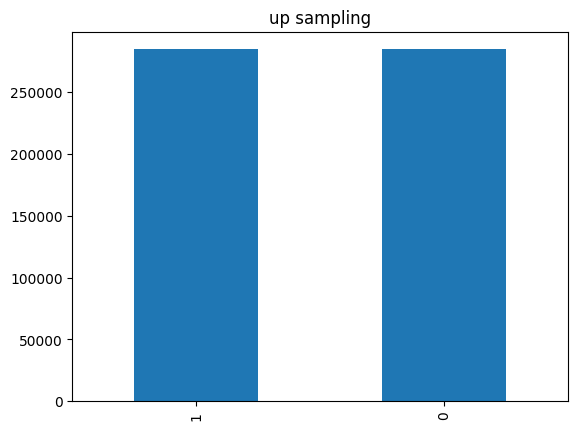

In [55]:
df_upsampling=pd.concat([class_1_upsampled,class_0])
df_upsampling
df_upsampling.Class.value_counts().plot(kind="bar",title="up sampling")

## Down Sampling
Random Over-sampling : In this, we increase the number of records for target variable which has very less records compared to other label.

In [46]:
class_0_downsampled=resample(class_0,replace=False,n_samples=len(class_1),random_state=0)

In [47]:
class_0_downsampling=pd.concat([class_0_downsampled,class_1])

In [48]:
class_0_downsampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
266085,162183.0,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,0.634425,...,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,2.99,0
172120,120967.0,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,0.477999,...,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,1.98,0
15136,26484.0,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,1.750710,...,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,1937.66,0
96393,65751.0,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,-1.910354,...,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,320.05,0
208225,137025.0,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,0.492435,...,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,11.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


<Axes: title={'center': 'up sampling'}>

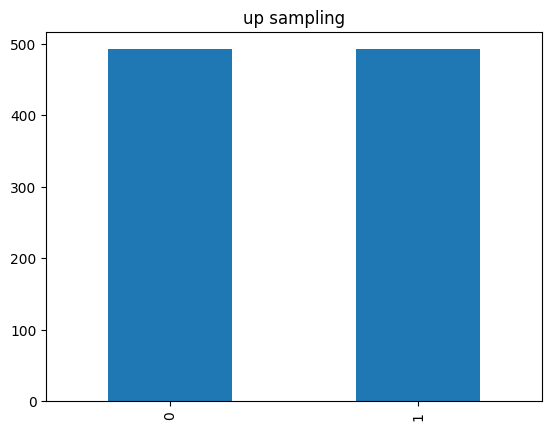

In [56]:
class_0_downsampling.Class.value_counts().plot(kind="bar",title="up sampling")